In [13]:
%matplotlib inline

DEBUG:Loaded backend module://matplotlib_inline.backend_inline version unknown.


In [48]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
%autoreload 2

In [50]:
POTENTIAL_EXERCISES = [
    p.ExerciseConfig("Dips", "kb", "push"),
    p.ExerciseConfig("Overhead Press", "bb", "push"),
    p.ExerciseConfig("Bench", "bb", "push"),
    p.ExerciseConfig("Pull ups", "bw", "pull"),
    p.ExerciseConfig("Chin Ups", "bw", "pull"),
    p.ExerciseConfig("Deadlift", "bb", "hinge"),
    p.ExerciseConfig("KB Swing", "kb", "hinge"),
    p.ExerciseConfig("KB Snatch", "kb", "hinge"),
    p.ExerciseConfig("Zercher Squat", "bb", "squat"),
    p.ExerciseConfig("Goblet Squat", "kb", "squat"),
]
EXERCISE_NAMES = [x.name for x in POTENTIAL_EXERCISES]
EXERCISE_LOOKUP = dict(zip(EXERCISE_NAMES, POTENTIAL_EXERCISES))

In [51]:
for name in EXERCISE_NAMES:
    ex = EXERCISE_LOOKUP[name]
    ex.set_one_rep_max(16)
# #     st.sidebar.write("1RM - " + name + f" Pounds ~= {int(ex.one_rep_max*2.2)}")


# EXERCISES_IN_PROGRAM = [EXERCISE_LOOKUP[x] for x in EXERCISE_NAMES_IN_PROGRAM]

MOTIONS = p.exercises_to_motions(POTENTIAL_EXERCISES)

In [52]:
fp = p.Program(MOTIONS.values())

In [53]:
plan = fp.get_nl_plan()

In [61]:
plan

,month,week,day,time,one_rm,week_percentage,day_percentage_in_week,day_percentage,motion,exercise,target_nl,reps,weight
0,1,1,1,month_1 week_1 day_1,16,0.28,0.40,0.112,push,Bench,33,5,11
0,1,1,1,month_1 week_1 day_1,16,0.28,0.40,0.112,push,Bench,33,3,13
0,1,1,1,month_1 week_1 day_1,16,0.28,0.40,0.112,push,Bench,33,5,11
0,1,1,1,month_1 week_1 day_1,16,0.28,0.40,0.112,push,Bench,33,4,11
0,1,1,1,month_1 week_1 day_1,16,0.28,0.40,0.112,push,Bench,33,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,2,4,2,month_2 week_4 day_2,16,0.15,0.30,0.045,squat,Zercher Squat,7,3,10
22,2,4,2,month_2 week_4 day_2,16,0.15,0.30,0.045,squat,Zercher Squat,7,2,12
22,2,4,2,month_2 week_4 day_2,16,0.15,0.30,0.045,squat,Zercher Squat,7,4,11
23,2,4,3,month_2 week_4 day_3,16,0.15,0.48,0.072,squat,Zercher Squat,11,3,10


In [64]:
plan.groupby(["motion", "exercise", "one_rm", "weight"]).reps.count()

motion  exercise       one_rm  weight
hinge   KB Snatch      16      12        69
pull    Pull ups       16      10        24
                               11        31
                               12        26
                               13        21
                               14         6
push    Bench          16      10        25
                               11        35
                               12        35
                               13        20
                               14         3
squat   Zercher Squat  16      10        22
                               11        27
                               12        24
                               13        12
                               14         3
Name: reps, dtype: int64

In [60]:
t1 = plan[['time', 'one_rm', 'motion', 'target_nl']].drop_duplicates().reset_index()
t1['expected_ari'] = t1.one_rm * t1.target_nl*.725

0     382.8
1     162.4
2     394.4
3     278.4
4     475.6
      ...  
86    162.4
87     81.2
88    185.6
89     58.0
90    127.6
Length: 91, dtype: float64

In [56]:
plan.one_rm * plan.target_nl * .725

0     382.8
0     382.8
0     382.8
0     382.8
0     382.8
      ...  
22     81.2
22     81.2
22     81.2
23    127.6
23    127.6
Length: 383, dtype: float64

In [40]:
plan[['time', 'week_percentage', 'day_percentage_in_week', 'day_percentage']].drop_duplicates()

,time,motion,week_percentage,day_percentage_in_week,day_percentage
0,month_1 week_1 day_1,push,0.22,0.28,0.0616
1,month_1 week_1 day_2,push,0.22,0.20,0.0440
2,month_1 week_1 day_3,push,0.22,0.52,0.1144
3,month_1 week_2 day_1,push,0.15,0.34,0.0510
4,month_1 week_2 day_2,push,0.15,0.26,0.0390
...,...,...,...,...,...
19,month_2 week_3 day_2,squat,0.28,0.44,0.1232
20,month_2 week_3 day_3,squat,0.28,0.18,0.0504
21,month_2 week_4 day_1,squat,0.35,0.20,0.0700
22,month_2 week_4 day_2,squat,0.35,0.46,0.1610


In [45]:
import pandas as pd

In [47]:
plan

,month,week,day,time,week_percentage,day_percentage_in_week,day_percentage,motion,exercise,target_nl,reps,weight
0,1,1,1,month_1 week_1 day_1,0.22,0.28,0.0616,push,Dips,14,6,12
0,1,1,1,month_1 week_1 day_1,0.22,0.28,0.0616,push,Dips,14,5,12
0,1,1,1,month_1 week_1 day_1,0.22,0.28,0.0616,push,Dips,14,3,12
1,1,1,2,month_1 week_1 day_2,0.22,0.20,0.0440,push,Dips,10,6,12
2,1,1,3,month_1 week_1 day_3,0.22,0.52,0.1144,push,Dips,27,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...
23,2,4,3,month_2 week_4 day_3,0.35,0.34,0.1190,squat,Zercher Squat,23,5,11
23,2,4,3,month_2 week_4 day_3,0.35,0.34,0.1190,squat,Zercher Squat,23,6,11
23,2,4,3,month_2 week_4 day_3,0.35,0.34,0.1190,squat,Zercher Squat,23,4,12
23,2,4,3,month_2 week_4 day_3,0.35,0.34,0.1190,squat,Zercher Squat,23,1,13


In [46]:
pd.merge(
    plan.groupby(['time', 'motion', 'exercise']).reps.sum().reset_index(),
    plan[['time', 'motion', 'exercise', 'target_nl']].drop_duplicates(),
    how='inner',
    on=['time', 'motion','exercise']
)

,time,motion,exercise,reps,target_nl
0,month_1 week_1 day_1,hinge,KB Snatch,17,17
1,month_1 week_1 day_1,pull,Pull ups,9,19
2,month_1 week_1 day_1,push,Dips,14,14
3,month_1 week_1 day_1,squat,Zercher Squat,7,8
4,month_1 week_1 day_2,hinge,KB Snatch,12,22
...,...,...,...,...,...
91,month_2 week_4 day_2,squat,Zercher Squat,24,32
92,month_2 week_4 day_3,hinge,KB Snatch,12,12
93,month_2 week_4 day_3,pull,Pull ups,14,15
94,month_2 week_4 day_3,push,Dips,20,33


In [38]:
plan[['time', 'motion', 'exercise', 'target_nl']].drop_duplicates()

,time,motion,exercise,target_nl
0,month_1 week_1 day_1,push,Dips,14
1,month_1 week_1 day_2,push,Dips,10
2,month_1 week_1 day_3,push,Dips,27
3,month_1 week_2 day_1,push,Dips,12
4,month_1 week_2 day_2,push,Dips,9
...,...,...,...,...
19,month_2 week_3 day_2,squat,Zercher Squat,24
20,month_2 week_3 day_3,squat,Zercher Squat,10
21,month_2 week_4 day_1,squat,Zercher Squat,13
22,month_2 week_4 day_2,squat,Zercher Squat,32


In [7]:
    _ex = p.ExerciseConfig("dips", "bw", "push", 16)
    _ex2 = p.ExerciseConfig("Overhead Press", "kb", "pull", 16)
    ex = p.Exercise(_ex)
    ex2 = p.Exercise(_ex2)
    mo = p.Motion([_ex])
    mo2 = p.Motion([_ex2])
    pr = p.Program([mo, mo2])
    pr

In [10]:
pr.get_percentage_plan()

,month,week,day,week_percentage,day_percentage_in_week,day_percentage
0,1,1,1,0.22,0.38,0.0836
1,1,1,2,0.22,0.20,0.0440
2,1,1,3,0.22,0.42,0.0924
3,1,2,1,0.28,0.40,0.1120
4,1,2,2,0.28,0.36,0.1008
5,1,2,3,0.28,0.24,0.0672
6,1,3,1,0.15,0.62,0.0930
7,1,3,2,0.15,0.18,0.0270
8,1,3,3,0.15,0.20,0.0300
9,1,4,1,0.35,0.48,0.1680


In [11]:
pr.get_nl_plan()

push
<class 'program.ExerciseConfig'>
pull
<class 'program.ExerciseConfig'>


,month,week,day,week_percentage,day_percentage_in_week,day_percentage,motion,nl
0,1,1,1,0.28,0.22,0.0616,push,15
1,1,1,2,0.28,0.38,0.1064,push,26
2,1,1,3,0.28,0.40,0.1120,push,27
3,1,2,1,0.15,0.50,0.0750,push,18
4,1,2,2,0.15,0.18,0.0270,push,6
5,1,2,3,0.15,0.32,0.0480,push,11
6,1,3,1,0.22,0.18,0.0396,push,9
7,1,3,2,0.22,0.38,0.0836,push,20
8,1,3,3,0.22,0.44,0.0968,push,24
9,1,4,1,0.35,0.16,0.0560,push,13


In [90]:
f = p.FullPlan([e, e2, e3], 3)

<AxesSubplot:xlabel='time'>

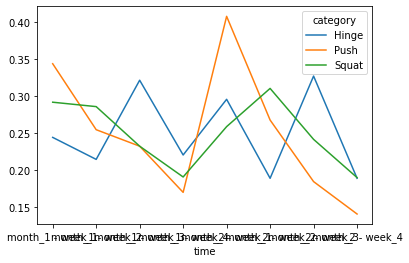

In [104]:
f.weekly_plan_nl_percent().plot()

<AxesSubplot:xlabel='time'>

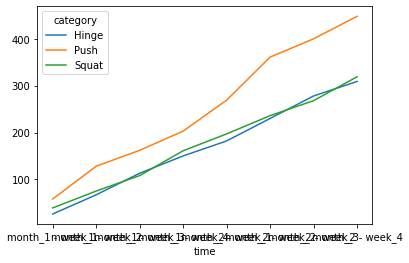

In [92]:
f.weekly_plan_nl().cumsum().plot()

In [96]:
f.weekly_benchmarks()

        month_1  month_2
week_1     0.28     0.22
week_2     0.15     0.15
week_3     0.35     0.35
week_4     0.22     0.28
        month_1  month_2
week_1     0.35     0.15
week_2     0.15     0.28
week_3     0.28     0.22
week_4     0.22     0.35
        month_1  month_2
week_1     0.22     0.28
week_2     0.28     0.22
week_3     0.15     0.15
week_4     0.35     0.35
